In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.plotting import scatter_matrix

%matplotlib inline

df_calls = pd.read_csv('data/dataset.csv')
df_pop = pd.read_csv('data/populationforecast.csv')

In [2]:
df_calls.head()

,Neighbourhood,Year,PopulationAge_0_to_14,PopulationAge_15_to_24,PopulationAge_25_to_34,PopulationAge_35_to_44,PopulationAge_45_to_54,PopulationAge_55_to_70,PopulationAge_71_to_120,Total_Population,Calls
0,1,2001,3579,1715,1065,640,374,276,138,7787,882
1,1,2002,3790,1813,1167,669,434,303,153,8329,962
2,1,2003,3819,2018,1321,759,455,356,142,8870,938
3,1,2004,4074,2154,1359,967,469,380,173,9576,1056
4,1,2005,3496,2195,1416,855,493,439,155,9049,1006


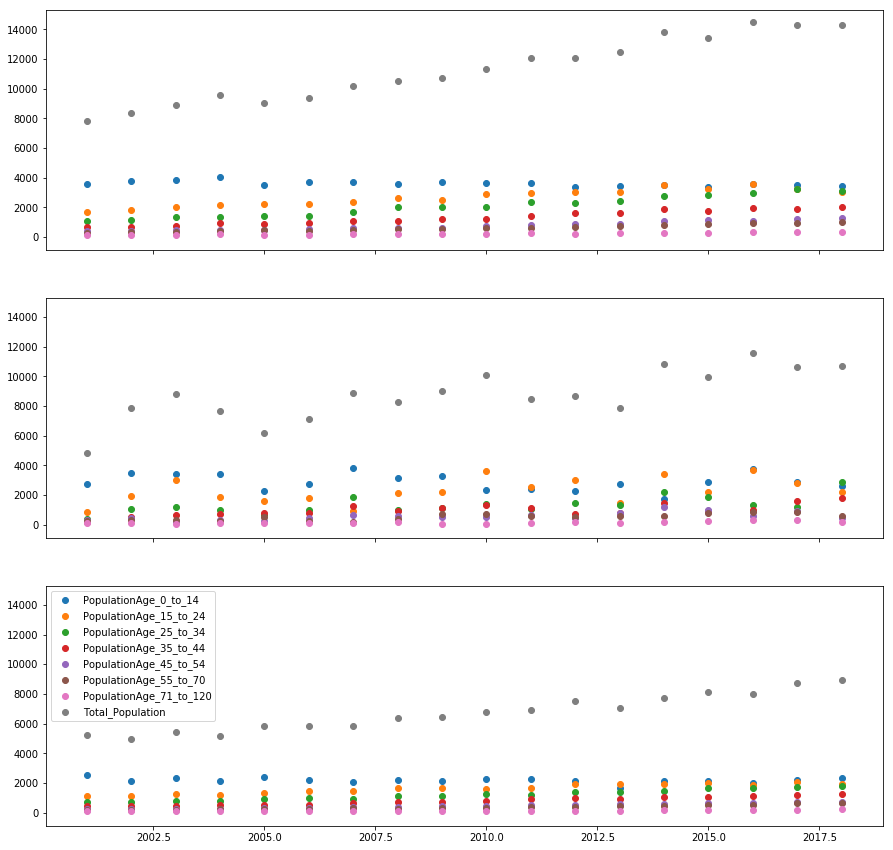

In [19]:
fig, ax = plt.subplots(3,1,sharex=True,sharey=True, figsize = (15,15))

cols = df_calls.columns[2:10]
for z,b in zip(ax,range(1,4)):
    for y in cols:
            z.scatter(df_calls[df_calls['Neighbourhood']==b]['Year'], df_calls[df_calls['Neighbourhood']==b][y])

plt.legend()
plt.show();

The data is separated in to 4 neighbourhoods - 1 thru 4. There are two residential, one residential/commercial, and one industrial. I need to figure out what the projected demand in each neighbourhood is to figure out what they're expected calls are. 

Neighbourhood 4 has no population data, as nobody lives there full-time. 

I see us needing to solve the following problems: 

1. Come up with call rates for each neighbourhood. 

2. Correlate call-rates with population groups. 

3. Estimate population for industrial neighbourhood based on calls.

4. Estimate call rate based on projected populations. 

Do I need to look at accuracy of population predictions? Get data from some third party? 

It seems pretty likely that there's a linear response between population sizes and call rates. 

There may be a case to be made for larger centers having a non-linear increase (maybe exponential or polynomial) but given that our population sizes are only getting up to 20k or so, a linear relationship is more likely. More research is necessary to determine if there are any existing relationships that we can capitalize on, but I'm time constrained currently. 

Neighbourhood 4 is an industrial zone. The people who will be making calls here will be working folks - so will respond better to working-age people then to the overall population. I should probably also take a look at the difference between 

I should probably also look at how the demographics are going to change. 

Reviewing them

In [21]:
df_calls['Intercept'] = 1

In [37]:
df_calls.dtypes

Neighbourhood              int64
Year                       int64
PopulationAge_0_to_14      int64
PopulationAge_15_to_24     int64
PopulationAge_25_to_34     int64
PopulationAge_35_to_44     int64
PopulationAge_45_to_54     int64
PopulationAge_55_to_70     int64
PopulationAge_71_to_120    int64
Total_Population           int64
Calls                      int64
Intercept                  int64
dtype: object

In [38]:
df_calls[df_calls['Neighbourhood']==1]

,Neighbourhood,Year,PopulationAge_0_to_14,PopulationAge_15_to_24,PopulationAge_25_to_34,PopulationAge_35_to_44,PopulationAge_45_to_54,PopulationAge_55_to_70,PopulationAge_71_to_120,Total_Population,Calls,Intercept
0,1,2001,3579,1715,1065,640,374,276,138,7787,882,1
1,1,2002,3790,1813,1167,669,434,303,153,8329,962,1
2,1,2003,3819,2018,1321,759,455,356,142,8870,938,1
3,1,2004,4074,2154,1359,967,469,380,173,9576,1056,1
4,1,2005,3496,2195,1416,855,493,439,155,9049,1006,1
5,1,2006,3678,2246,1401,922,531,420,161,9359,1005,1
6,1,2007,3693,2385,1692,1094,619,485,184,10152,1194,1
7,1,2008,3541,2627,1996,1082,581,507,188,10522,933,1
8,1,2009,3685,2489,2013,1199,626,525,209,10746,1213,1
9,1,2010,3607,2900,2048,1244,729,573,213,11314,1318,1


In [5]:
df_calls.shape

(72, 11)

In [7]:
df_calls[df_calls['Neighbourhood']==1].describe()

,Neighbourhood,Year,PopulationAge_0_to_14,PopulationAge_15_to_24,PopulationAge_25_to_34,PopulationAge_35_to_44,PopulationAge_45_to_54,PopulationAge_55_to_70,PopulationAge_71_to_120,Total_Population,Calls
count,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1.0,2009.500000,3598.888889,2675.388889,2085.388889,1308.222222,757.777778,604.388889,226.722222,11256.777778,1303.388889
std,0.0,5.338539,182.158912,570.476698,708.833021,465.921295,290.475990,235.311843,74.775590,2201.400398,327.176358
min,1.0,2001.000000,3337.000000,1715.000000,1065.000000,640.000000,374.000000,276.000000,138.000000,7787.000000,882.000000
25%,1.0,2005.250000,3487.750000,2207.750000,1404.750000,933.250000,502.500000,424.750000,164.000000,9413.250000,1005.250000
50%,1.0,2009.500000,3589.500000,2763.500000,2030.500000,1221.500000,677.500000,549.000000,211.000000,11030.000000,1265.500000
75%,1.0,2013.750000,3683.250000,3063.750000,2701.750000,1720.500000,1032.500000,780.250000,266.000000,13186.250000,1574.750000
max,1.0,2018.000000,4074.000000,3548.000000,3214.000000,2032.000000,1251.000000,1007.000000,364.000000,14481.000000,1855.000000


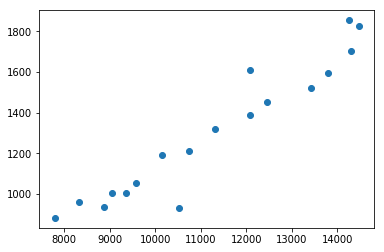

In [39]:
#check neighbourhood 1 for relationship between calls and pop 
filt1 = df_calls['Neighbourhood']==1

plt.scatter(df_calls[filt1]['Total_Population'],df_calls[filt1]['Calls']);

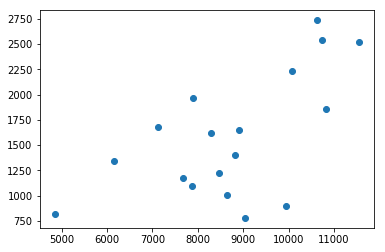

In [49]:
#check neighbourhood 2 for relationship between calls and pop
filt1 = df_calls['Neighbourhood']==2

model2 = sm.OLS(df_calls[filt1]['Calls'],df_calls[filt1][['Intercept','Total_Population']])
results2 = model2.fit()

plt.scatter(df_calls[filt1]['Total_Population'],df_calls[filt1]['Calls']);

In [50]:
results2.summary()

C:\Users\spenc\Anaconda3\envs\dhassign\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Calls   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     10.08
Date:                Fri, 26 Oct 2018   Prob (F-statistic):            0.00589
Time:                        19:04:58   Log-Likelihood:                -136.24
No. Observations:                  18   AIC:                             276.5
Df Residuals:                      16   BIC:                             278.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -356.6513    623.206     -0.572      0.575   -1677.788     964.486
Total_Population     0.2221      0.070      3.174      0.006       0.074       0.370
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.924
Skew:                          -0.460   Prob(JB):                        0.630
Kurtosis:                       2.380   Cond. No.                     4.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

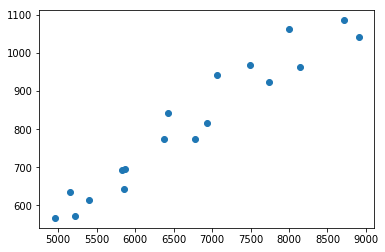

In [10]:
#check neighbourhood 3 for relationship between calls and pop

filt1 = df_calls['Neighbourhood']==3

plt.scatter(df_calls[filt1]['Total_Population'],df_calls[filt1]['Calls']);

In [14]:
# Get the combined population to test against the neighbourhood 2. 
total_pop = []

for x in range(2001,2019):
    total_pop.append(df_calls[df_calls['Year']==x]['Total_Population'].sum())

[17856,
 21163,
 23095,
 22397,
 21042,
 22336,
 24922,
 25192,
 26211,
 28160,
 27489,
 28228,
 27418,
 32361,
 31520,
 34035,
 33665,
 33896]

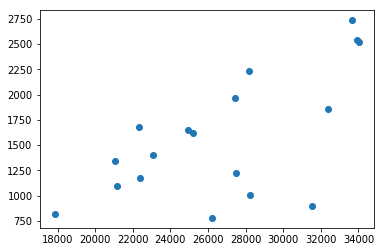

In [23]:
filt1 = df_calls['Neighbourhood']==2

model2_mod = sm.OLS(df_calls[filt1]['Calls'],total_pop)

plt.scatter(total_pop,df_calls[filt1]['Calls']);

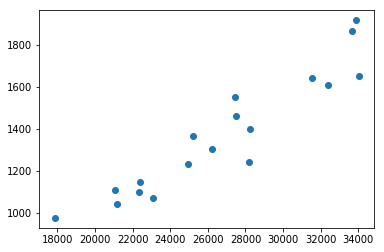

In [54]:
filt1 = df_calls['Neighbourhood']==4

plt.scatter(total_pop,df_calls[filt1]['Calls']);

In [22]:
filt2 = df_calls['Neighbourhood']==1
model2_m = sm.OLS(df_calls[filt2]['Calls'],df_calls[filt2][['Intercept','Total_Population']])
results2_m = model2_m.fit()
results2_m.summary()

C:\Users\spenc\Anaconda3\envs\dhassign\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Calls   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     168.4
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           6.57e-10
Time:                        21:58:34   Log-Likelihood:                -107.25
No. Observations:                  18   AIC:                             218.5
Df Residuals:                      16   BIC:                             220.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -295.3884    125.406     -2.355      0.032    -561.236     -29.540
Total_Population     0.1420      0.011     12.977      0.000       0.119       0.165
==============================================================================
Omnibus:                        6.425   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                3.979
Skew:                          -0.688   Prob(JB):                        0.137
Kurtosis:                       4.847   Cond. No.                     6.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

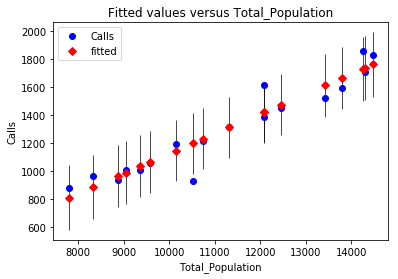

In [25]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results2_m,1,ax=ax)
plt.show()

### Estimating Living Population 